In [63]:
import torch
from torchvision import transforms as T
from IPython.display import display
from PIL import Image
import urllib

In [64]:
# load model from torch hub
all_models = torch.hub.list('pytorch/vision:v0.9.0')
print(all_models)

['alexnet', 'deeplabv3_mobilenet_v3_large', 'deeplabv3_resnet101', 'deeplabv3_resnet50', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'fcn_resnet101', 'fcn_resnet50', 'googlenet', 'inception_v3', 'lraspp_mobilenet_v3_large', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'wide_resnet101_2', 'wide_resnet50_2']


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


In [65]:
model = hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0


In [66]:
# evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [67]:
# preprocess image
preprocess = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225])
])

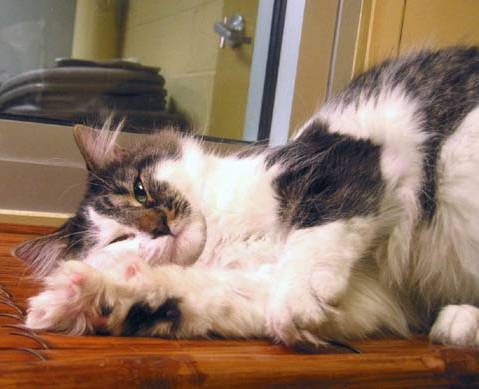

In [68]:
image = Image.open('/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4059.jpg')
display(image)

In [69]:
# preprocess image for resnet
image_t = preprocess(image).unsqueeze(0)
# predict
out = model(image_t)
print(out.shape)

torch.Size([1, 1000])


In [70]:
# convert probabilities to percentange
max_value, index = torch.max(out, 1)
print('max value in output', max_value, '\nindex of max value: ', index)

max value in output tensor([12.2752], grad_fn=<MaxBackward0>) 
index of max value:  tensor([283])


In [71]:
# map to imagenet
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, "/kaggle/working/imagenet_classes.txt")
with open('/kaggle/working/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
print('total classes: ', len(labels))

total classes:  1000


In [72]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Persian cat', 82.25535583496094)

In [73]:
# top 5
sorted_values, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Persian cat', 82.25535583496094),
 ('tabby', 5.473259449005127),
 ('tiger cat', 1.3745718002319336),
 ('lynx', 1.2657197713851929),
 ('Angora', 1.1476919651031494)]